## Assignment - 4: SVM - IRIS Data Classification 
### ID: eo9232
### Name: Md Reza
### IE7860 - Winter 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
iris = load_iris()

## Data Exploration 

In [2]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert to float
iris_df = iris_df.astype(float)
# Append "target"
iris_df['label'] = iris.target
# Use string label
iris_df['label'] = iris_df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **Data Preprocessing**

## **Handling Missing Values** ##

In [4]:
iris_df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
label                False
dtype: bool

In [5]:
print("Number of rows with 0 values for each variable")
for col in iris_df.columns:
    missing_rows = iris_df.loc[iris_df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
sepal length (cm): 0
sepal width (cm): 0
petal length (cm): 0
petal width (cm): 0
label: 0


## Data Preperation

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Convert categorical 'label' into numerical
iris_df['label'] = iris_df['label'].replace({'setosa':0,'versicolor':1,'virginica':2})

In [8]:
# Create the input and target
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df[['label']]

# Scaled the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert DataFrame into np array
X = np.asarray(X_scaled )
y = np.asarray(y)

#### Split the data set in a training set and a test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

## Hyper-parameters tune with GridSearchCV to Find the Best Parameters

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':('sigmoid', 'linear', 'rbf'), 'C':[1, 10, 100]}
svc = GridSearchCV(SVC(random_state=0,probability=True), parameters, cv = 10, verbose=False, n_jobs=-1)
print('\x1b[1;03;30;1;95m'+ 'GridSearchCV:\x1b[1;94m')
svc.fit(X_train,y_train)

GridSearchCV:


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'kernel': ('sigmoid', 'linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [11]:
best_C = list(svc.best_params_.values())[0]
best_Kernel = list(svc.best_params_.values())[1]

print('\x1b[1;03;30;1;95m'+ 'Best C:\x1b[1;94m ', best_C)
print('\x1b[1;03;30;1;95m'+ 'Best Kernel:\x1b[1;94m ', best_Kernel)

Best C:  1
Best Kernel:  linear


## Building The MLP Model

In [12]:
svc = SVC(C=best_C, kernel=best_Kernel)

## **Model Compilation** ##

In [13]:
svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Traning & Test Accuracy

In [14]:
train_accuracy = (svc.score(X_train, y_train))
test_accuracy  = (svc.score(X_test, y_test))

print('\x1b[1;03;30;1;95m' + 'Accuracy on training set:\x1b[1;94m ', '%.4f' % train_accuracy)
print('\x1b[1;03;30;1;95m'+ 'Accuracy on test set:\x1b[1;94m ', '%.4f' % test_accuracy)

Accuracy on training set:  0.9821
Accuracy on test set:  0.9737


##### Cross-Validation Score on Traning Data

In [15]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123456)
cv_results = cross_val_score(svc, X_train, y_train,  verbose=0, cv=kfold, scoring="accuracy")

print('\x1b[1;03;30;1;95m' + 'Cross-validation mean scroe on training set:\x1b[1;94m ', '%.4f' % cv_results.mean())
print('\x1b[1;03;30;1;95m' + 'Cross-validation standard deviation scroe on training set:\x1b[1;94m ', '%.4f' % cv_results.std())

Cross-validation mean scroe on training set:  0.9462
Cross-validation standard deviation scroe on training set:  0.0830


##### Cross-Validation Score on Test Data

In [16]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123456)
cv_results = cross_val_score(svc, X_test, y_test,  verbose=0, cv=kfold, scoring="accuracy")

print('\x1b[1;03;30;1;95m' + 'Cross-validation mean scroe on test set:\x1b[1;94m ', '%.4f' % cv_results.mean())
print('\x1b[1;03;30;1;95m' + 'Cross-validation standard deviation scroe on test set:\x1b[1;94m ', '%.4f' % cv_results.std())

Cross-validation mean scroe on test set:  0.9750
Cross-validation standard deviation scroe on test set:  0.0750


## Evaluate The MLP Model

In [17]:
y_pred = svc.predict(X_test)

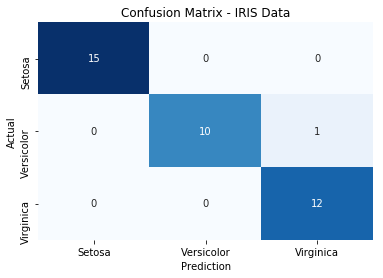

In [18]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

test_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(test_matrix, annot = True, xticklabels = ["Setosa", "Versicolor", "Virginica"], yticklabels = ["Setosa", "Versicolor", "Virginica"], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix - IRIS Data")
plt.show()

In [19]:
print('\x1b[1;03;30;1;95m'+ 'Classifiction Report For IRIS Data:\x1b[1;94m')
print('\x1b[1;03;30;1;95m'+ '\nResults on the test set: \x1b[1;94m')
print(classification_report(y_test, y_pred))

Classifiction Report For IRIS Data:

Results on the test set: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



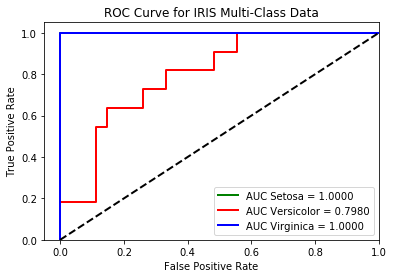

In [20]:
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from itertools import cycle

# Binarize the output
y = label_binarize(y_train, classes=[0, 1, 2])
y_test_b = label_binarize(y_test, classes=[0, 1, 2])

n_classes = y.shape[1]

classifier = OneVsRestClassifier(svm.SVC(kernel=best_Kernel, probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['green', 'red', 'blue'])
class_labels = ["Setosa", "Versicolor", "Virginica"]
for i, color, lbl in zip(range(n_classes), colors, class_labels):

#for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
    label = 'AUC {0} = {1:0.4f}'.format(lbl, roc_auc[i]))         
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for IRIS Multi-Class Data')
plt.legend(loc="lower right")
plt.show()